<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/main/GPS_preprocessing/GPS_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gpxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [2]:
!pip install rdp

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4587 sha256=2775d019b64d24215eb844c12baaccd424d07909b6fad25b808d3eb3e4794639
  Stored in directory: /root/.cache/pip/wheels/5d/12/ec/0fc50553af000b9c3d2c74b9f77a01ae4bfe856e9917ac239c
Successfully built rdp


In [12]:
!pip install mplleaflet

  Preparing metadata (setup.py) ... done
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28565 sha256=66fde297572ec535df3351f0d3ec3155f4e3bd269e36aab64c6ed31ed5cea5d8
  Stored in directory: /root/.cache/pip/wheels/0d/00/a9/595e650d2e0a5ca4119c0f6e03dfd1093e5d67fe2c0e5d49f0
Successfully built mplleaflet


In [37]:
import gpxpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
import mplleaflet
import folium
from folium.plugins import HeatMap
import base64

In [4]:
with open('./ONER_2023_FN.gpx') as fh:
  gpx_file = gpxpy.parse(fh)

In [5]:
segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([
    {'lat': p.latitude,
     'lon': p.longitude,
     'ele': p.elevation,
     'time': p.time,
     } for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head()

,lat,lon,ele
time,,,
None,50.73446,-2.90010,3.400000
None,50.73446,-2.90010,3.400000
None,50.73425,-2.89969,2.200000
None,50.73431,-2.89961,2.175167
None,50.73427,-2.89954,2.156287


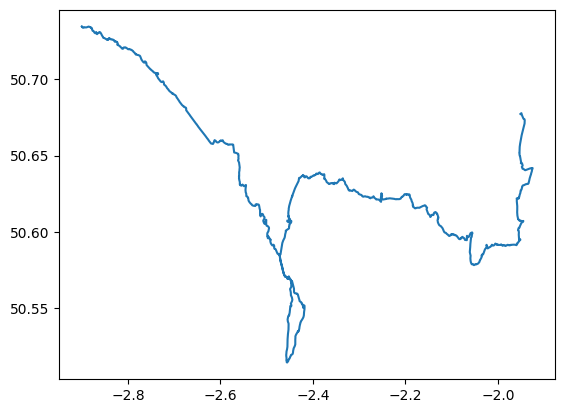

In [6]:
plt.plot(coords['lon'].values, coords['lat'].values)

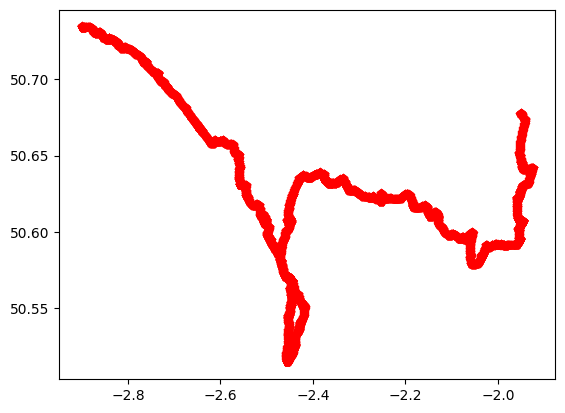

In [7]:
plt.plot(coords['lon'].values, coords['lat'].values, 'rp')

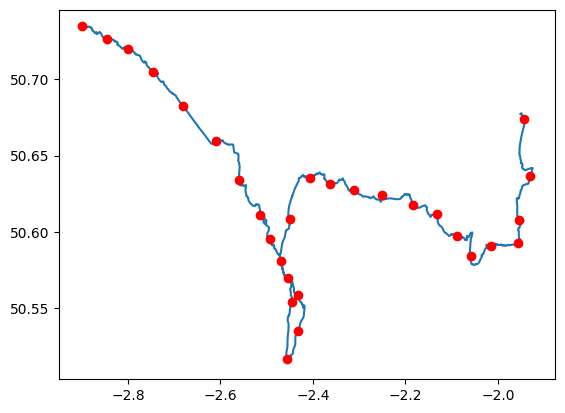

In [8]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::150], coords['lat'].values[::150], 'ro')

4223 points reduced to 185


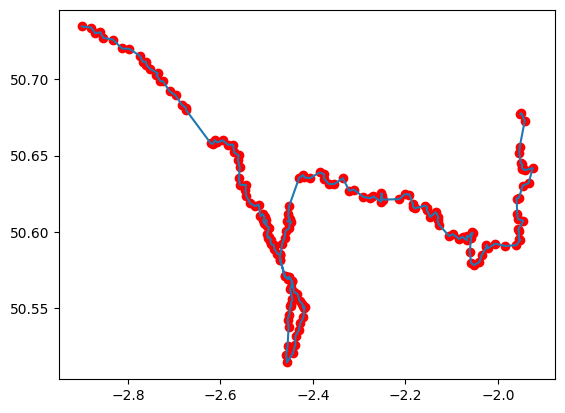

In [17]:
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon = 1e-3)
print("{} points reduced to {}".format(coords.shape[0], simple_coords.shape[0]))
fig = plt.figure()
plt.plot(simple_coords[:,0], simple_coords[:,1],'ro')
plt.plot(simple_coords[:,0], simple_coords[:,1]);

In [34]:
# Create a Folium map
m = folium.Map()

# Embed the base64-encoded image data into an HTML file
html = f'<img src="data:image/png;base64,{figdata_png_base64}" alt="Matplotlib Figure">'

# Save the HTML content to a file
with open('figure.html', 'w') as f:
    f.write(html)

# Add the HTML file as an IFrame to the map
iframe = folium.IFrame(html=open('figure.html', 'r').read(), width=fig.get_figwidth(), height=fig.get_figheight())
popup = folium.Popup(iframe, max_width=2650)
folium.Marker(location=[coords['lat'].mean(), coords['lon'].mean()], popup=popup).add_to(m)

# Define GPS path coordinates (assuming you have them stored in a DataFrame 'coords' with columns 'lat' and 'lon')
gps_path = list(zip(coords['lat'], coords['lon']))

# Add GPS path as a polyline to the map
folium.PolyLine(locations=gps_path, color='blue', weight=2.5, opacity=0.8).add_to(m)

# Calculate bounding box of GPS path coordinates
min_lat = min(coords['lat'])
max_lat = max(coords['lat'])
min_lon = min(coords['lon'])
max_lon = max(coords['lon'])

# Set map's zoom and center to show only the GPS path
m.fit_bounds([(min_lat, min_lon), (max_lat, max_lon)])

# Display the map
m


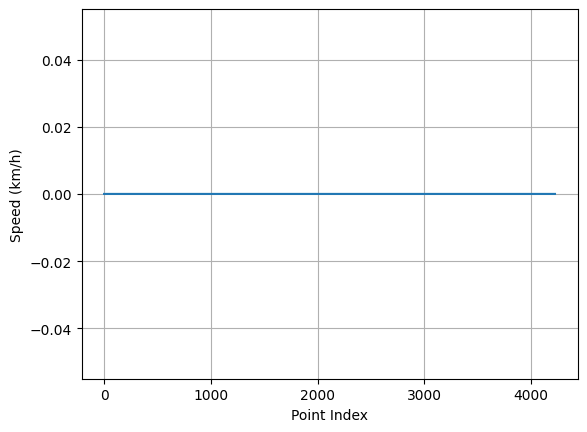

In [47]:
#speed is constant in this data set so this is irrelevant
segment.points[0].speed, segment.points[-1].speed = 0., 0.
gpx_file.add_missing_speeds()
speed = np.array([p.speed * 3.6 if p.speed is not None else 0.0 for p in segment.points])
import matplotlib.pyplot as plt

plt.plot(speed)
plt.xlabel('Point Index')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.show()
